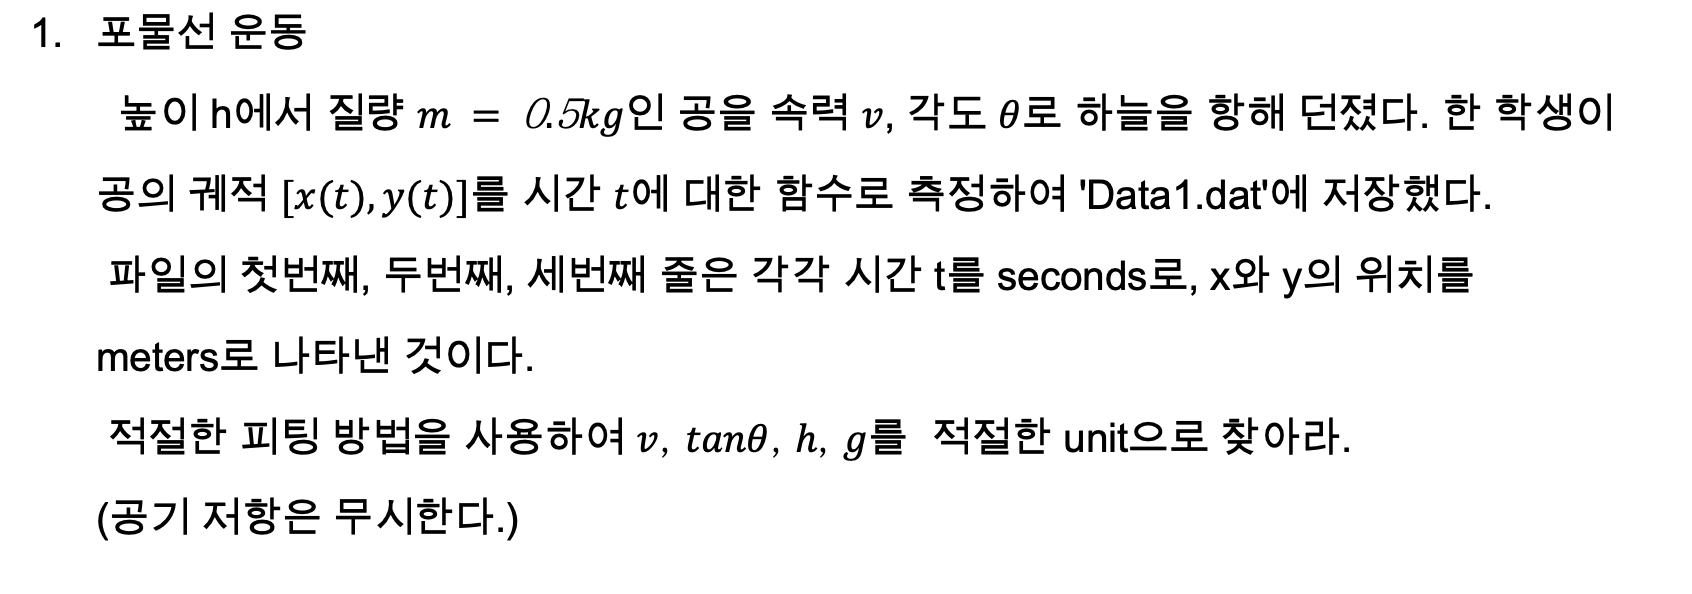

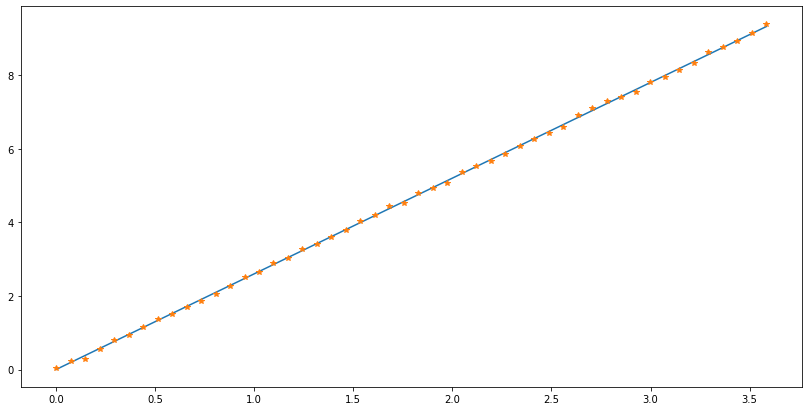

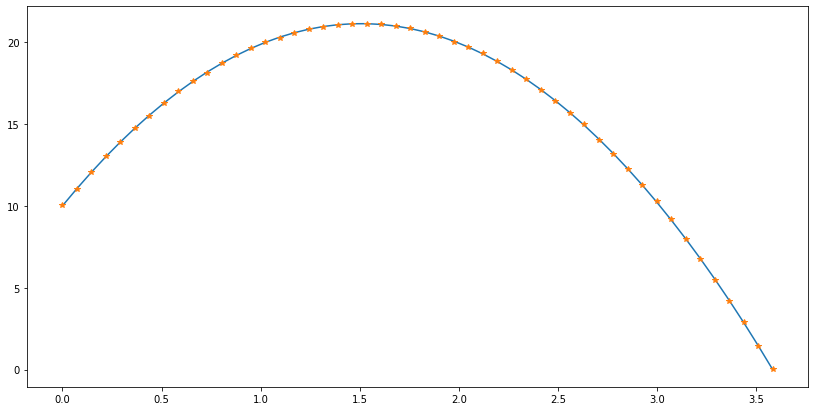

v = 15.009047436855012 
tan(theta) = 5.6793612209356095 
h = 10.009213250778064 
g = 9.806757965020052


In [24]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14,7)

data = np.genfromtxt('./hw5data/Data1.dat',delimiter=',')    # data = loadtxt('filename',dtype=None,delimiter=',')
t = data[0]
x = data[1]
y = data[2]

def xf(t,vx):
    return vx*t

xfparm, cvar = curve_fit(xf,t,x)
vx = xfparm[0]
plt.plot(t,xf(t,vx))
plt.plot(t,x,'*')
plt.show()

def yf(t,g,vy,h):
    return -1/2*g*t**2 + vy*t + h

yfparm, cvar = curve_fit(yf,t,y,)
g = yfparm[0]
vy = yfparm[1]
h = yfparm[2]
plt.plot(t,yf(t,g,vy,h))
plt.plot(t,y,'*')
plt.show()
v = (vx**2+vy**2)**0.5
tan = vy/vx

print('v =',v,
      '\ntan(theta) =',tan,
      '\nh =',h,
      '\ng =',g)

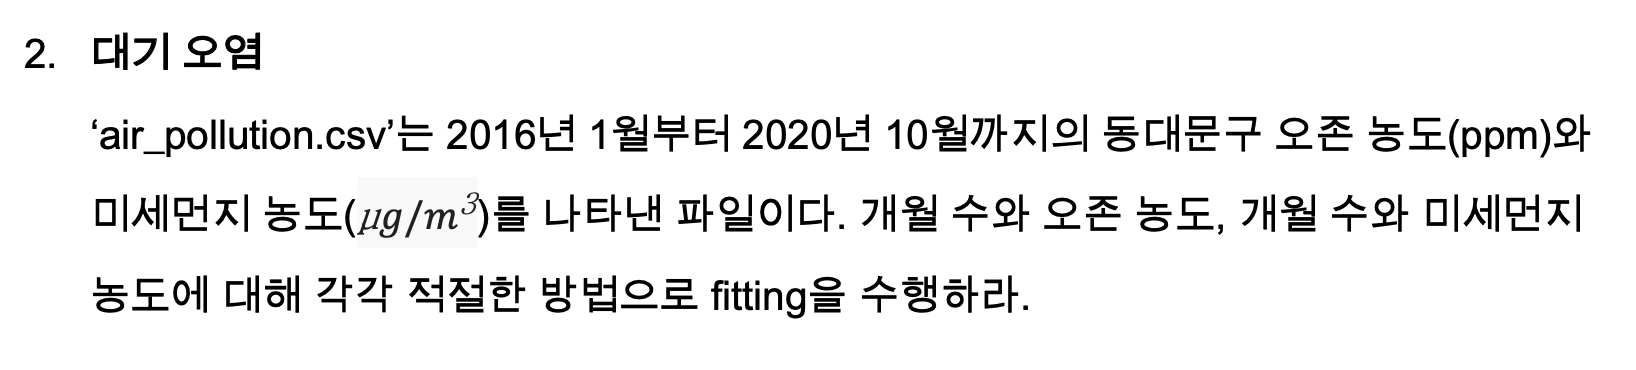

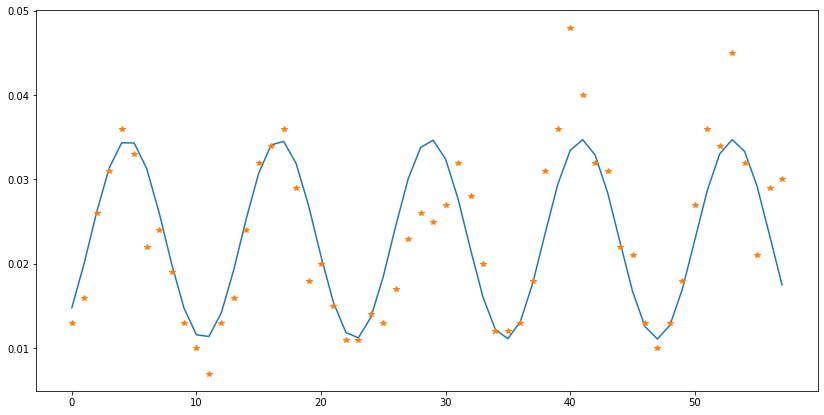

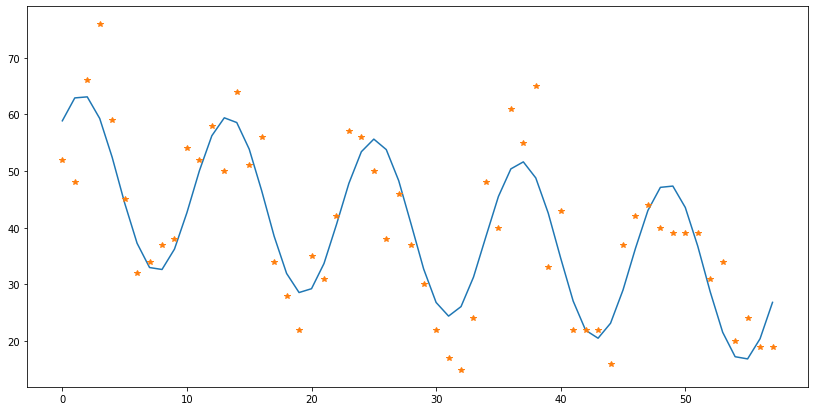

[201601. 201602. 201603. 201604. 201605. 201606. 201607. 201608. 201609.
 201610. 201611. 201612. 201701. 201702. 201703. 201704. 201705. 201706.
 201707. 201708. 201709. 201710. 201711. 201712. 201801. 201802. 201803.
 201804. 201805. 201806. 201807. 201808. 201809. 201810. 201811. 201812.
 201901. 201902. 201903. 201904. 201905. 201906. 201907. 201908. 201909.
 201910. 201911. 201912. 202001. 202002. 202003. 202004. 202005. 202006.
 202007. 202008. 202009. 202010.]


In [539]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14,7)

data = np.genfromtxt('./hw5data/air_pollution.csv',delimiter=',') .T
data = data[:,1:]
monthx = data[0]
month = np.arange(len(month))
oz = data[1]
dust = data[2]

def ozf(month,a,b,c,d):
    return a*np.sin(b*(month-c))+d

ozparm, cvar = curve_fit(ozf,month,oz,[0.003,0.5,1,0.02])
xaxis = []
n = 5
for i in range(n):
    xaxis.append(monthx[int(i*len(monthx)/n)])

plt.plot(month,ozf(month,*ozparm))
#plt.plot(month,oz-ozf(month,*ozparm))
plt.plot(month,oz,'*')
plt.xticks()
plt.show()

def dustf(month,a,b,c,d,e):
    return a*np.sin(b*(month-c))+d*month+e 

dustparm, cvar = curve_fit(dustf,month,dust,[300,100,-1,60,50])
plt.plot(month,dustf(month,*dustparm))
#plt.plot(month,dust-dustf(month,*dustparm))
plt.plot(month,dust,'*')

plt.xticks()
plt.show()
print(monthx)


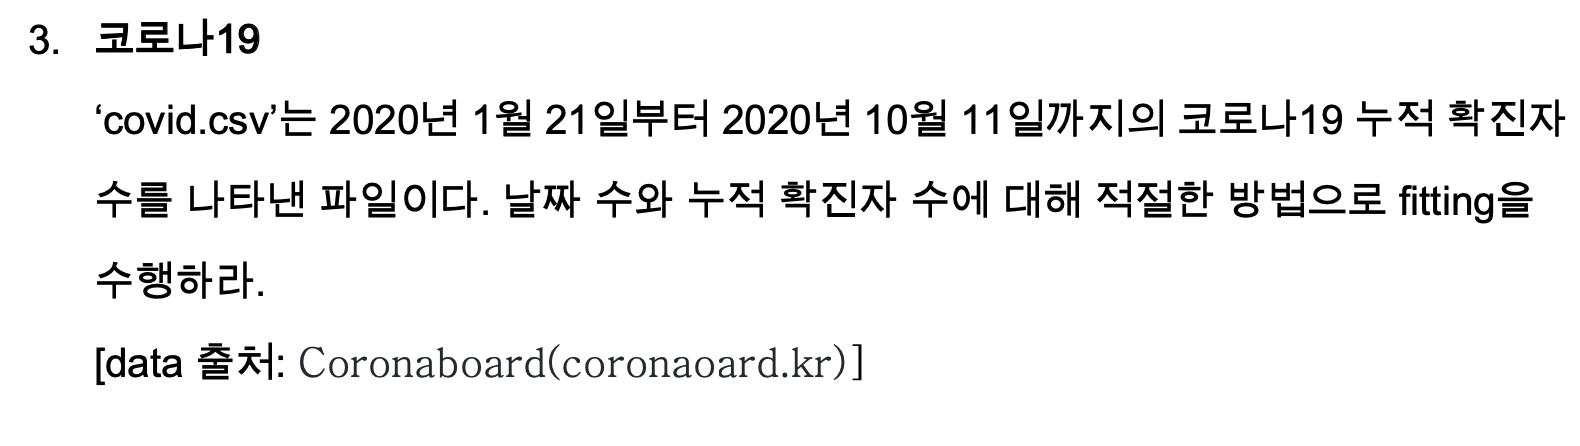

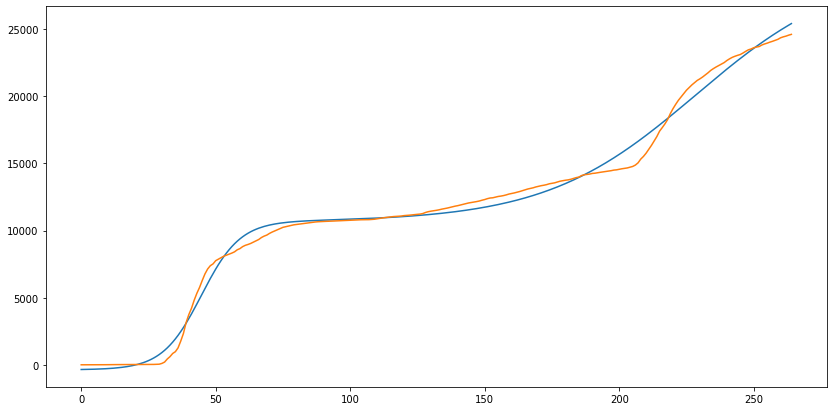

In [536]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.special import expit

plt.rcParams["figure.figsize"] = (14,7)

data = np.genfromtxt('./hw5data/covid.csv',delimiter=',').T
data = data[:,1:]
date = data[0]-20200000
date = np.arange(len(date))
pat = data[1]

def covid(date,a,b,c,d,e,f,g):
    return a*expit(b*(date-c)) + d*expit(e*(date-f)) + g    # expit = 1/(1+exp(-x))

covidparm, cvar = curve_fit(covid,date,pat)

plt.plot(date,covid(date,*covidparm))
plt.plot(date,pat)
plt.show()

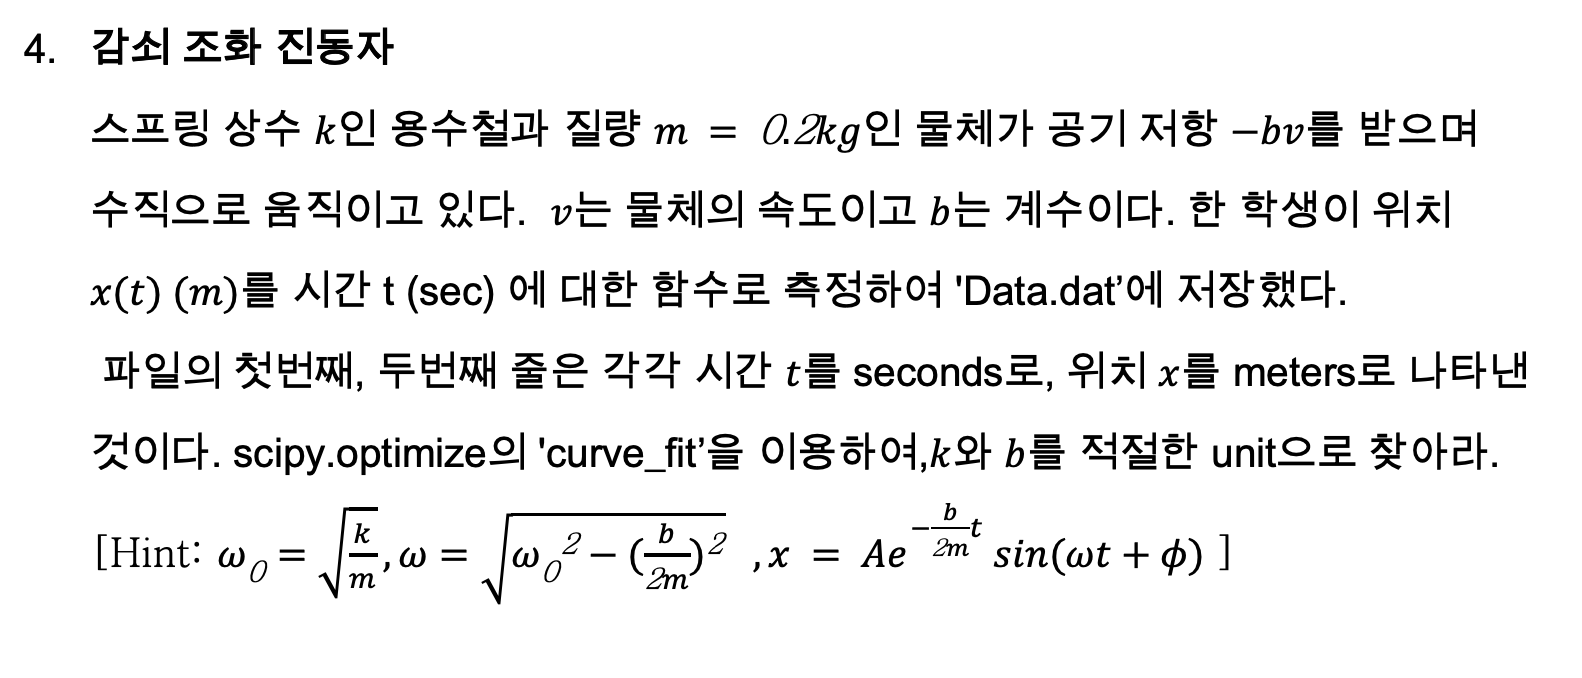

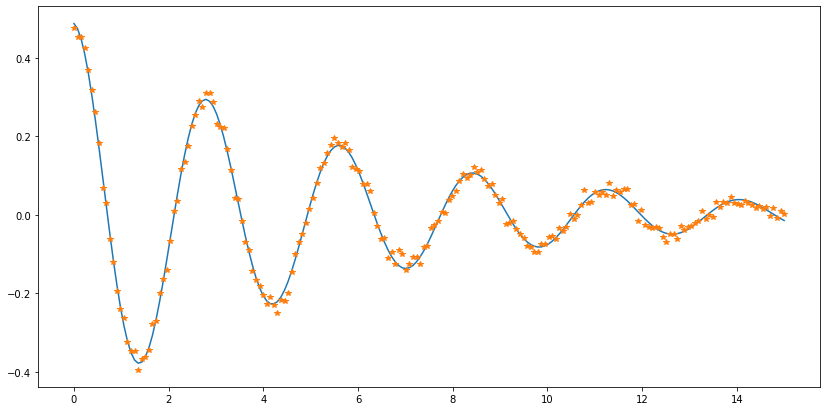

k = 0.995458464773165 
b= 0.07214341664393585


In [210]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14,7)

data = np.genfromtxt('./hw5data/Data.dat',delimiter=',')
t = data[0]
x = data[1]

m = 0.2
def dampedfun(t,A,w,b,c):
    return np.exp(-b/(2*m)*t)*A*np.cos((w**2-(b/2*m)**2)**0.5*t+c)

damped, cov = curve_fit(dampedfun,t,x,[0.5,2,0.1,3])


plt.plot(t,dampedfun(t,*damped))
plt.plot(t,x,'*')
plt.show()

k = m*damped[1]**2
print('k =',k,
      '\nb=',damped[2])